In [1]:
# First I will import the basic libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
# import the file.

bf = pd.read_csv('../input/BlackFriday.csv')

# Take a look on it!

bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# One more look...

bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


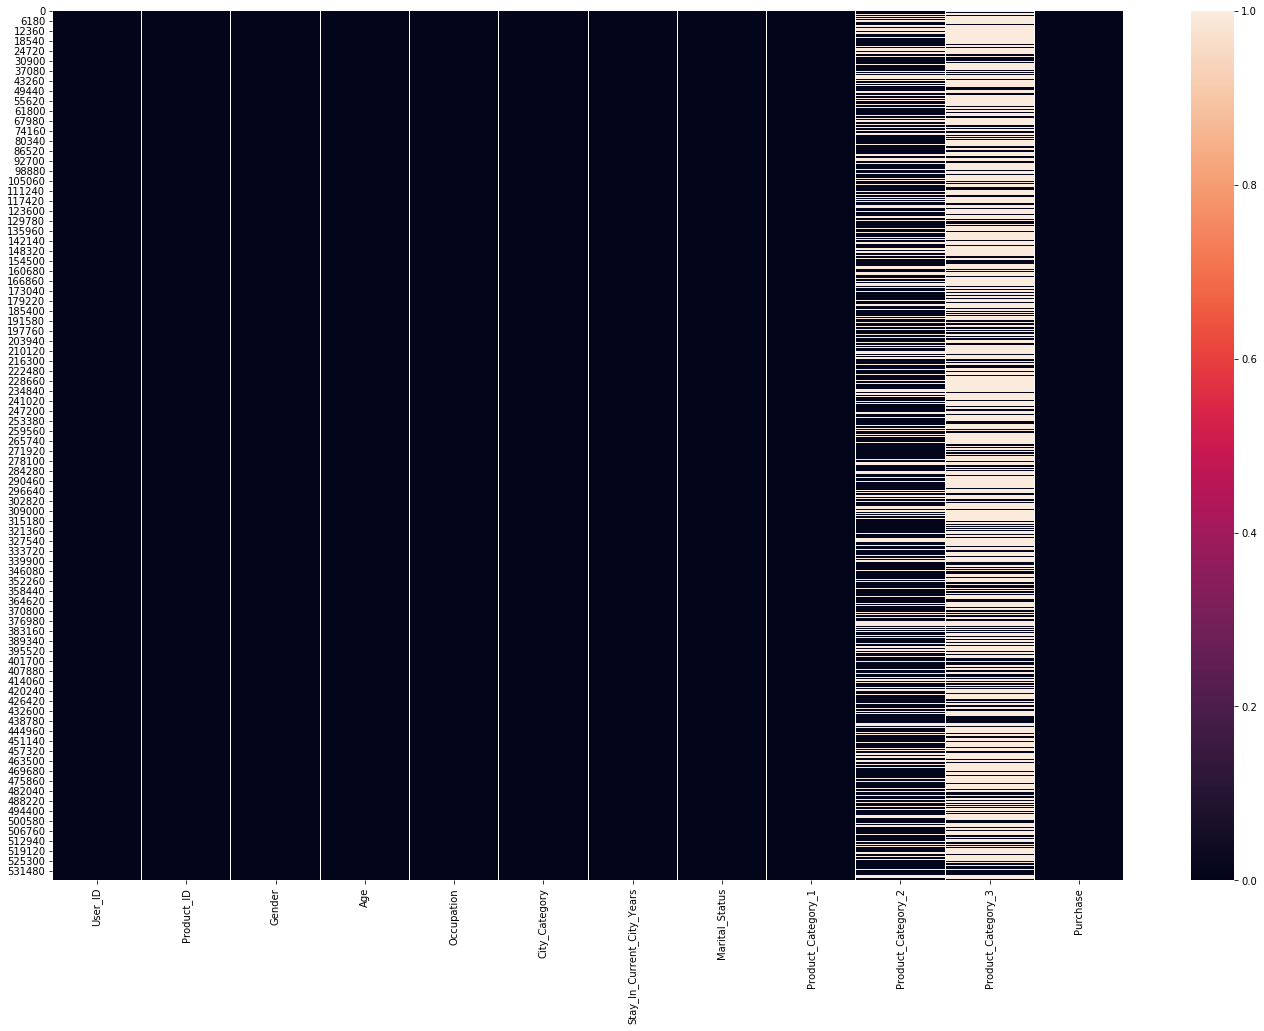

In [4]:
# Let's see if there are missing values.

plt.figure(figsize=(24,16))

sns.heatmap(bf.isnull())

# We can see that there are missing values only in "Product_Category_2"and "Product_Category_3""
# This time I will do different and, before to solve missing value problems, 
# I will see if I can do some conclusions form datas.

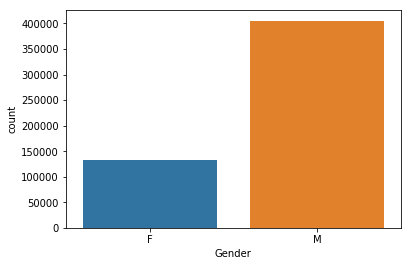

In [5]:
# First Conclusion: Men go to Black Friday more than women.

sns.countplot(bf.Gender)

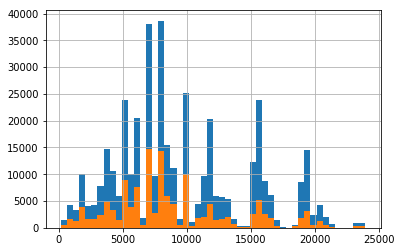

In [6]:
# How much Men and Women people spent in Black Friday.
# Men ---> blue bar
# Women ---> orange bar


bf[bf.Gender == 'M']['Purchase'].hist(bins=50)
bf[bf.Gender == 'F']['Purchase'].hist(bins=50)

# apparently the same proportion with the last graph.

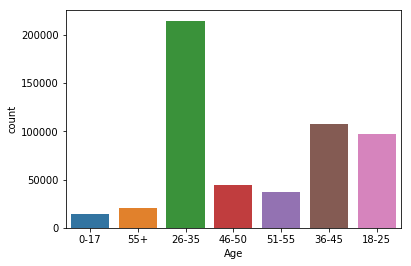

In [7]:
# Second Conclusion: People who has 26-35 participate in Black Friday much more than others. 
# Followed by 36-45, 18-25, 46-50, 51-55, 55+ and 0-17. 
# In summary we have three groups with the almost the same quantity of people between each element within the group.
# Group #1 36-45/18-25; group #2 46-50/51-55 and group #3 55+/0-17.

sns.countplot(bf.Age)

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


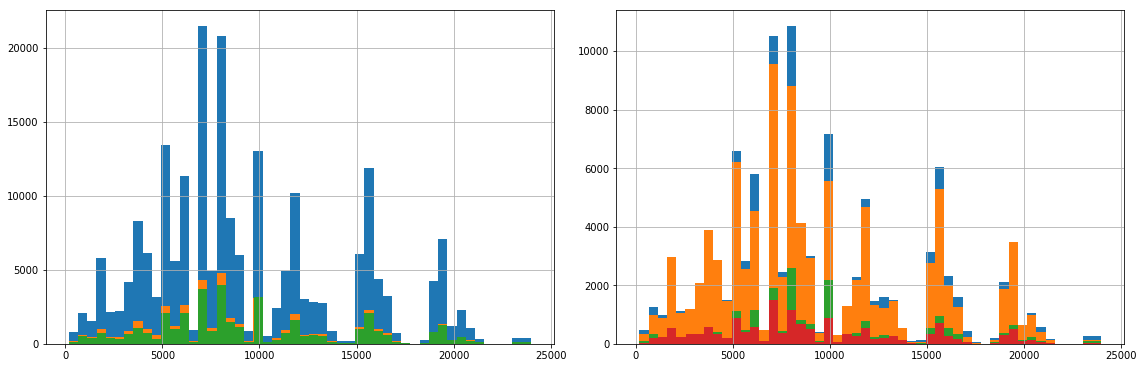

In [8]:
# How much different Ages people spent in Black Friday.
# 26-35 ---> blue bar
# 36-45 ---> orange bar
# 18-25 ---> green bar
#--------------------
# 46-50 ---> blue bar
# 51-55 ---> orange bar
# 55+ ---> green bar
# 0-17 ---> red bar


plt.subplot(2,2,1)
bf[bf.Age == '26-35']['Purchase'].hist(bins=50, figsize=(16,10))

plt.subplot(2,2,2)
bf[bf.Age == '36-45']['Purchase'].hist(bins=50)
bf[bf.Age == '18-25']['Purchase'].hist(bins=50)

plt.subplot(2,2,1)
bf[bf.Age == '46-50']['Purchase'].hist(bins=50)
bf[bf.Age == '51-55']['Purchase'].hist(bins=50)

plt.subplot(2,2,2)
bf[bf.Age == '55+']['Purchase'].hist(bins=50)
bf[bf.Age == '0-17']['Purchase'].hist(bins=50)

plt.tight_layout()

# apparently the same proportion with the last graph.

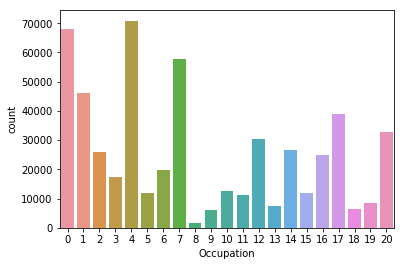

In [9]:
# Third Conclusion: We can't do much conclusions here, but is possible to realize that people with
# lows and highs occupation number go out to Black Friday more than who was mediums occupation number.
# Between lows and highs, low occupation number go out more than high occupation number.

sns.countplot(bf.Occupation)

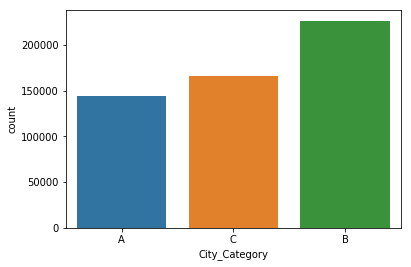

In [10]:
# Fourth Conclusion: People who lives in City B bought much more than others. 
# Followed by City C and A, with the almost the same number of people.

sns.countplot(bf.City_Category)

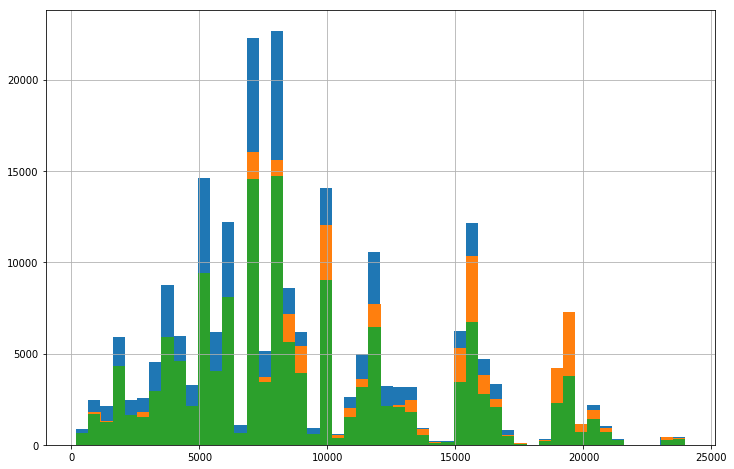

In [11]:
# How much people who lives in different cities spent in Black Friday.
# City B ---> blue bar
# City C ---> orange bar
# City A ---> green bar

plt.figure(figsize=(12,8))
bf[bf.City_Category == 'B']['Purchase'].hist(bins=50)
bf[bf.City_Category == 'C']['Purchase'].hist(bins=50)
bf[bf.City_Category == 'A']['Purchase'].hist(bins=50)

# Fifth Conclusion: We can see that, in less amount of money, people who lives in City A and C spent almost the same.


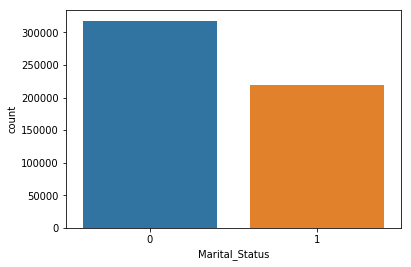

In [12]:
# Sixth Conclusion: People who are married attend the event more than who aren't. 

sns.countplot(bf.Marital_Status)

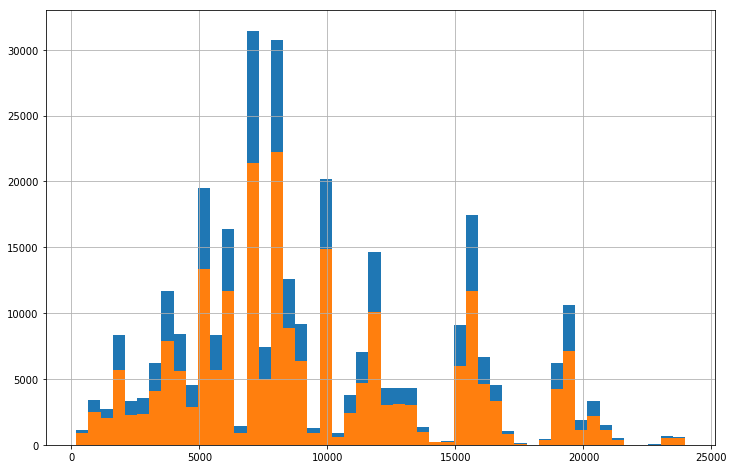

In [13]:
# How much Married and No Married people spent in Black Friday.
# No maried ---> blue bar
# Married ---> orange bar

plt.figure(figsize=(12,8))
bf[bf.Marital_Status == 0]['Purchase'].hist(bins=50)
bf[bf.Marital_Status == 1]['Purchase'].hist(bins=50)

# apparently the same proportion with the last graph.

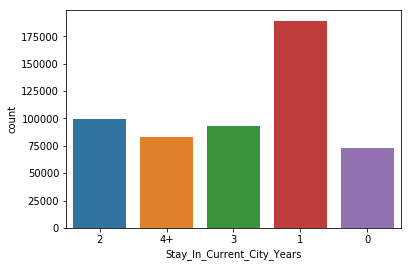

In [14]:
# Seventh Conclusion: People who has less time in the same city go to Black Friday more than has more time.
# The exception is who has less than 1 (one) year.

sns.countplot(bf.Stay_In_Current_City_Years)

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


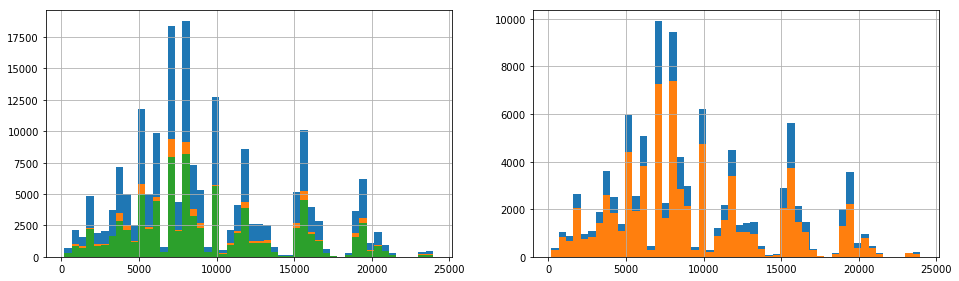

In [15]:
# How much people, who stay in the same city a couple of time, spent in Black Friday.
# 1 year ---> blue bar
# 2 years ---> orange bar
# 0 year ---> green bar
#--------------------
# 3 years ---> blue bar
# 4+ years ---> orange bar


plt.subplot(2,2,1)
bf[bf.Stay_In_Current_City_Years == '1']['Purchase'].hist(bins=50, figsize=(16,10))

plt.subplot(2,2,2)
bf[bf.Stay_In_Current_City_Years == '2']['Purchase'].hist(bins=50)
bf[bf.Stay_In_Current_City_Years == '0']['Purchase'].hist(bins=50)

plt.subplot(2,2,1)
bf[bf.Stay_In_Current_City_Years == '3']['Purchase'].hist(bins=50)
bf[bf.Stay_In_Current_City_Years == '4+']['Purchase'].hist(bins=50)

# apparently the same proportion with the last graph.

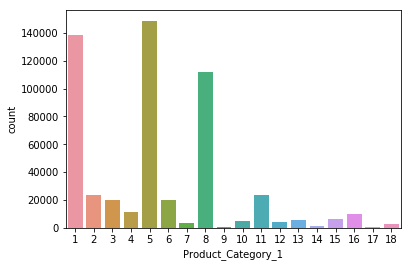

In [16]:
sns.countplot(bf.Product_Category_1)

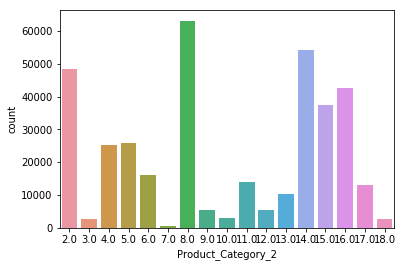

In [17]:
sns.countplot(bf.Product_Category_2)

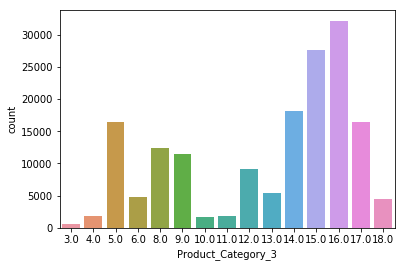

In [18]:
sns.countplot(bf.Product_Category_3)

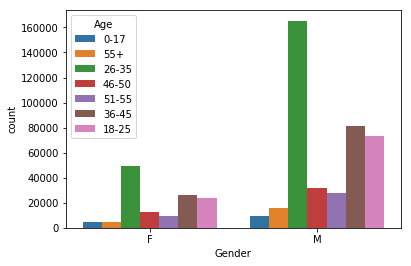

In [19]:
# We can see the same behavior and both male and female people, when we look in Age column.
# Hence, no relevant conclusions.

sns.countplot(data=bf, x=bf.Gender, hue=bf.Age)

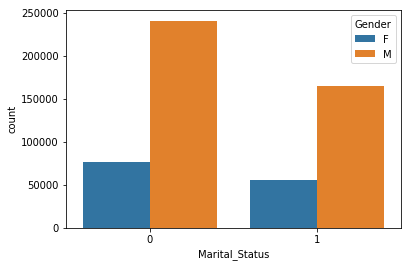

In [20]:
# We can see the same behavior and both male and female people, when we look in Marital Status column.
# Hence, no relevant conclusions.

sns.countplot(data=bf, x=bf.Marital_Status, hue=bf.Gender)

In [21]:
# We will see now about the distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1b6f65a20>,
      dtype=object)

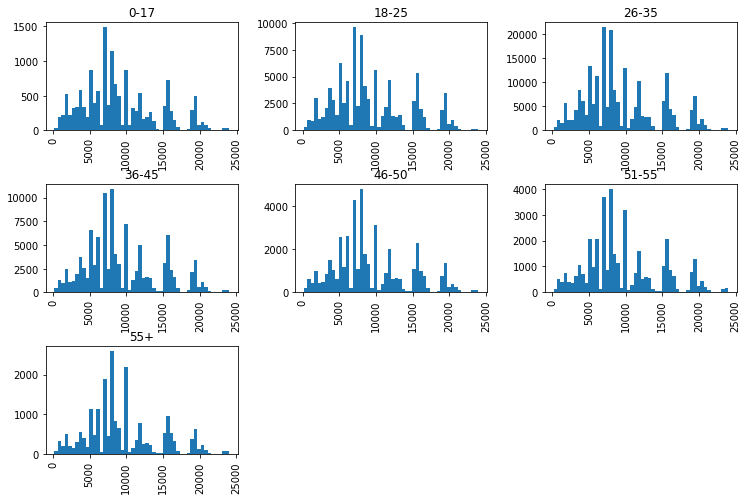

In [22]:
bf.Purchase.hist(bins=50, figsize=(12,8), by=bf.Age)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1b6d1c7f0>,
      dtype=object)

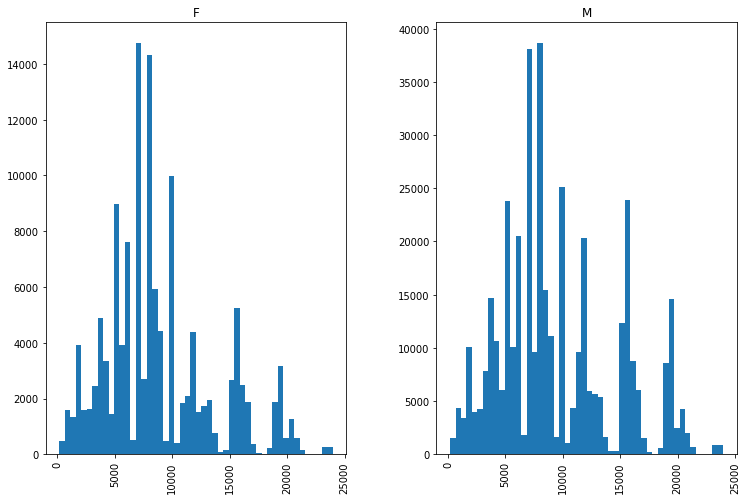

In [23]:
bf.Purchase.hist(bins=50, figsize=(12,8), by=bf.Gender)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1b693e9b0>,
      dtype=object)

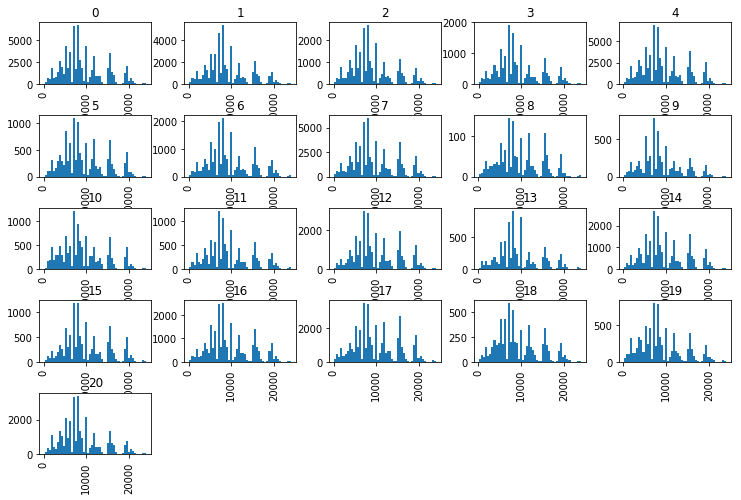

In [24]:
bf.Purchase.hist(bins=50, figsize=(12,8), by=bf.Occupation)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1b63574e0>,
      dtype=object)

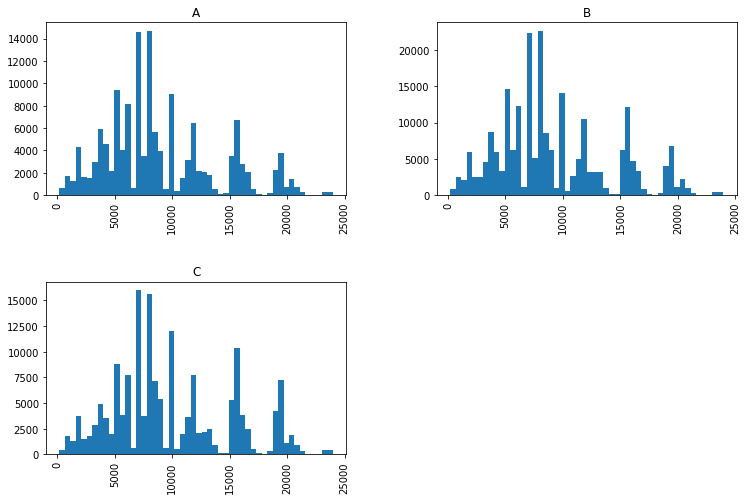

In [25]:
bf.Purchase.hist(bins=50, figsize=(12,8), by=bf.City_Category)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1b56b15f8>,
      dtype=object)

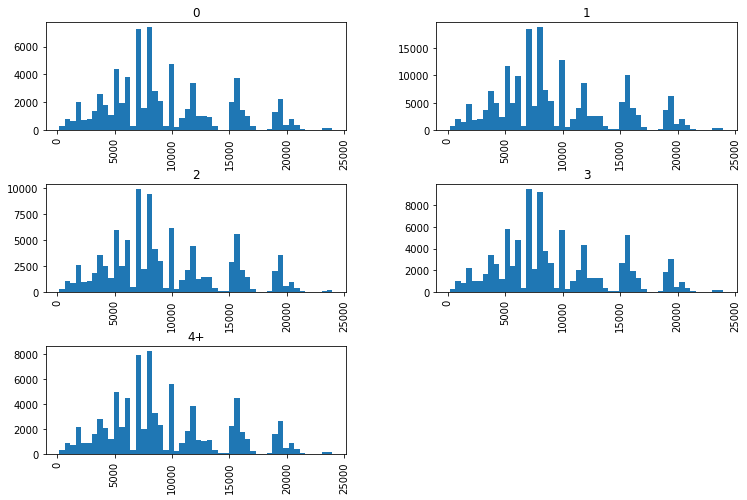

In [26]:
bf.Purchase.hist(bins=50, figsize=(12,8), by=bf.Stay_In_Current_City_Years)

In [27]:
# We can realize, when we see the graphs above, that, regardless the parameters, the graphs has almost the same shape.
# It's a very curious observation. Everyone has almost the same behavior according to money spend.

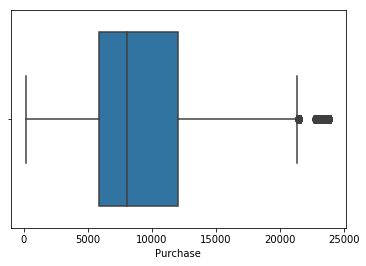

In [28]:
sns.boxplot(x=bf.Purchase)

In [29]:
# Now let's start to fill the missing values.

bf.Product_Category_2.isnull().sum()

# This columns don't have a lot of missing value.

166986

In [30]:
bf.Product_Category_3.isnull().sum()

# Despite having a lot of missing values, I choose to use this column with fill values.

373299

In [31]:
# I'm trying to understand the values in this column to figure out how can I solve this.

bf.Product_Category_2.value_counts()

8.0     63058
14.0    54158
2.0     48481
16.0    42602
15.0    37317
5.0     25874
4.0     25225
6.0     16251
11.0    13945
17.0    13130
13.0    10369
9.0      5591
12.0     5419
10.0     2991
3.0      2835
18.0     2730
7.0       615
Name: Product_Category_2, dtype: int64

In [32]:
# This column has few numbers, so I can calculate the mean and use it to fill the missing values.
# I won't use the lowest number.
# mean = 15.5

bf.Product_Category_3.value_counts().head()

16.0    32148
15.0    27611
14.0    18121
17.0    16449
5.0     16380
Name: Product_Category_3, dtype: int64

In [33]:
# Fill the missing values and check!

bf.Product_Category_3.fillna(value=15.5, inplace=True)

bf.Product_Category_3.head(10)

0    15.5
1    14.0
2    15.5
3    15.5
4    15.5
5    15.5
6    17.0
7    15.5
8    15.5
9    15.5
Name: Product_Category_3, dtype: float64

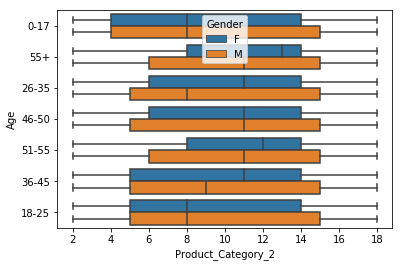

In [34]:
# I will see if I can use the mean in the boxplot graph to figure out what number I will fill.
# I will use Age and Gende.

sns.boxplot(x=bf.Product_Category_2, y=bf.Age, hue=bf.Gender)

# I think that this graph will help me to fill the missing values in this column.

In [35]:
# This function will fill the missing values according to the means in the graph above.

def impute_value(cols):
    Product = cols[0]
    Age = cols[1]
    Gender = cols[2]
    
    if pd.isnull(Product):
        if Age == '0-17':
            return 8.0
        elif Age == '18-25':
            return 8.0
        elif Age == '26-35':
            if Gender == 'M':
                return 8.0
            else:
                return 11.0
        elif Age == '36-45':
            if Gender == 'M':
                return 9.0
            else:
                return 11.0
        elif Age == '46-50':
            return 11.0
        else:
            if Gender == 'M':
                return 11.0
            else:
                return 13.0
    else:
        return Product
    

In [36]:
# Now I will apply the function wihtin the column.

bf['Product_Category_2'] = bf[['Product_Category_2','Age', 'Gender']].apply(impute_value,axis=1)

In [37]:
# Let's take a look!

bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,15.5,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,15.5,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,15.5,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,11.0,15.5,7969


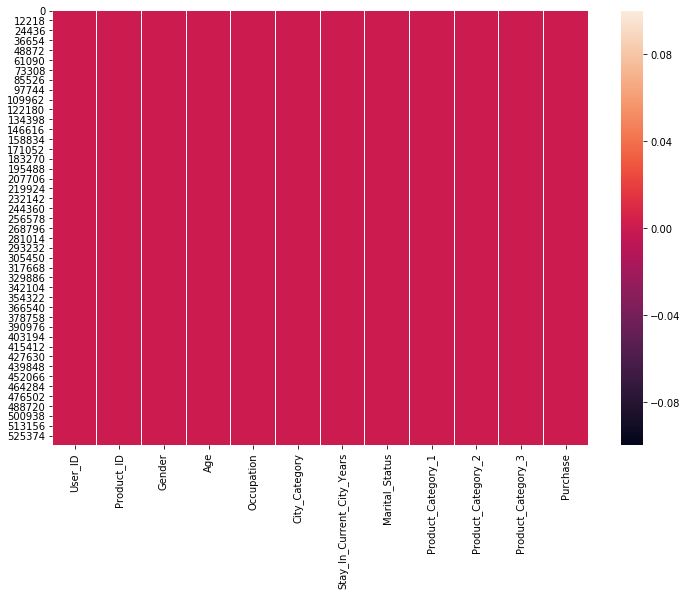

In [38]:
# Let's see if there are any missing values remaining.

plt.figure(figsize=(12,8))

sns.heatmap(bf.isnull())

In [39]:
# Now the dataset is ready!
# Let's build the model.

# Split the dataset

X = bf.iloc[:,2:-1].values
y = bf.iloc[:, -1].values

In [40]:
X

array([['F', '0-17', 10, ..., 3, 8.0, 15.5],
       ['F', '0-17', 10, ..., 1, 6.0, 14.0],
       ['F', '0-17', 10, ..., 12, 8.0, 15.5],
       ...,
       ['M', '36-45', 16, ..., 8, 15.0, 15.5],
       ['M', '36-45', 16, ..., 5, 9.0, 15.5],
       ['M', '36-45', 16, ..., 5, 8.0, 15.5]], dtype=object)

In [41]:
y

array([ 8370, 15200,  1422, ...,  8043,  7172,  6875])

In [42]:
# Encoding categorical data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])
labelencoder_X_2 = LabelEncoder()
X[:, 1] = labelencoder_X_2.fit_transform(X[:, 1])
labelencoder_X_3 = LabelEncoder()
X[:, 3] = labelencoder_X_3.fit_transform(X[:, 3])
labelencoder_X_4 = LabelEncoder()
X[:, 4] = labelencoder_X_4.fit_transform(X[:, 4])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:,1:]

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [43]:
X

array([[ 0. ,  0. ,  0. , ...,  3. ,  8. , 15.5],
       [ 0. ,  0. ,  0. , ...,  1. ,  6. , 14. ],
       [ 0. ,  0. ,  0. , ..., 12. ,  8. , 15.5],
       ...,
       [ 0. ,  0. ,  1. , ...,  8. , 15. , 15.5],
       [ 0. ,  0. ,  1. , ...,  5. ,  9. , 15.5],
       [ 0. ,  0. ,  1. , ...,  5. ,  8. , 15.5]])

In [44]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [45]:
# Feature Scaling

from  sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [46]:
# I will use some Regression models and figure out what will be the best, that is, the lowest "Mean Squared Error".

In [47]:
# Fitting Multiple Linear Regression to the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)

In [49]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

22002098.868445475

In [50]:
# Fitting Polynomial Regression to the dataset

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly,y_train)

# I tried other "degree" values and figure out that the number "3" is the better.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
# Predicting the Test set results

y_pred = regressor.predict(poly_reg.fit_transform(X_test))

In [52]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

17557610.070971403

In [53]:
# Fitting Random Forest Regression to the dataset

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 600, random_state = 0)
regressor.fit(X_train, y_train)

# I tried other "n_estimators" values and figure out that the number "600" is the better.

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [54]:
y_pred = regressor.predict(X_test)

In [55]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

9206491.54570951

In [56]:
# Comparing the "Mean Squared Error" between the three models, 
# we can realize that the "Random Forest Regression" is the better model for this problem.

In [57]:
# About the Black Friday dataset, we can see some conclusions below:

#1 - Men go to Black Friday more than women;
#2 - People who has 26-35 participate in Black Friday much more than others. 
# Followed by 36-45, 18-25, 46-50, 51-55, 55+ and 0-17. 
# In summary we have three groups with the almost the same quantity of people between each element within the group.
# Group #1 36-45/18-25; group #2 46-50/51-55 and group #3 55+/0-17;
#3 - We can't do much conclusions here, but is possible to realize that people with
# lows and highs occupation number go out to Black Friday more than who was mediums occupation number.
# Between lows and highs, low occupation number go out more than high occupation number;
#4 - People who lives in City B bought much more than others. 
# Followed by City C and A, with the almost the same number of people;
#5 - We can see that, in less amount of money, people who lives in City A and C spent almost the same;
#6 - People who are married attend the event more than who aren't; &
#7 - People who has less time in the same city go to Black Friday more than has more time.
# The exception is who has less than 1 (one) year.

# Observation: 

# We can realize that, regardless the parameters, the graphs has almost the same shape.
# It's a very curious observation. Everyone has almost the same behavior according to money spend.

In [ ]:
# This dataset was Amazing!!!!
# Until the next one!!!